In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!cp kaggle.json ~/.kaggle


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json 

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!unzip '/content/HPI.csv.zip'

Archive:  /content/HPI.csv.zip
  inflating: House Price India.csv   


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df=pd.read_csv('/content/HPI.csv')
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
df.isnull().any()

id                                       False
Date                                     False
number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
waterfront present                       False
number of views                          False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Postal Code                              False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns 
print(categorical_cols)

Index([], dtype='object')


In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
x=df.drop('Price',axis=1) 
y=df["Price"] 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 
min_max_scaler = preprocessing.MinMaxScaler() 
x_train = min_max_scaler.fit_transform(x_train) 
x_test = min_max_scaler.fit_transform(x_test) 
#print(x_scale) 
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(11696, 22)
(2924, 22)
(11696,)
(2924,)


In [ ]:
model = Sequential([ 
Dense(128, activation='relu', input_shape=(x.shape[1],)), 
Dense(64, activation='relu'), 
Dense(32, activation='relu'), 
Dense(1, activation='sigmoid'), 
])
model.compile(optimizer="adam", 
loss="mean_squared_error", 
metrics=['mae'] 
) 
hist = model.fit(x_train,y_train,batch_size=32,epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
366/366 [==============================] - 6s 3ms/step - loss: 426039902208.0000 - mae: 539625.0000 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 2/25
366/366 [==============================] - 1s 3ms/step - loss: 426039803904.0000 - mae: 539625.1250 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 3/25
366/366 [==============================] - 1s 3ms/step - loss: 426040164352.0000 - mae: 539625.1250 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 4/25
366/366 [==============================] - 2s 6ms/step - loss: 426039934976.0000 - mae: 539625.1250 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 5/25
366/366 [==============================] - 1s 3ms/step - loss: 426039738368.0000 - mae: 539625.0625 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 6/25
366/366 [==============================] - 1s 3ms/step - loss: 426040131584.0000 - mae: 539625.3750 - val_loss: 423428456448.0000 - val_mae: 536155.6250
Epoch 7/25
366/3

In [ ]:
mse,mae=model.evaluate(x_test,y_test) 
print(mse) 
print(mae)

92/92 [==============================] - 0s 3ms/step - loss: 423428456448.0000 - mae: 536155.6250
423428456448.0
536155.625


In [ ]:
test_data = x_test[:10] 
predictions = model.predict(test_data)

1/1 [==============================] - 0s 428ms/step


<Axes: >

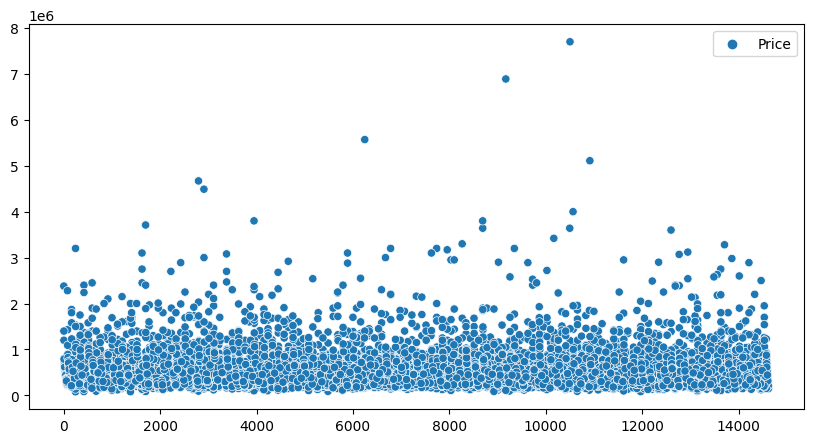

In [ ]:
fig = plt.figure(figsize=(10,5)) 
residuals = (y_test,y_train) 
sns.scatterplot(residuals)

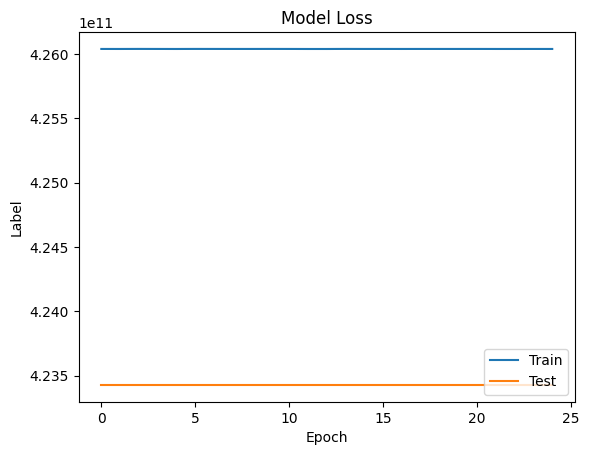

In [ ]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Label') 
plt.xlabel('Epoch') 
plt.legend(['Train','Test'],loc='lower right') 
plt.show() 

In [ ]:
test_data = x[:10] 
predictions = model.predict(test_data) 

1/1 [==============================] - 0s 116ms/step


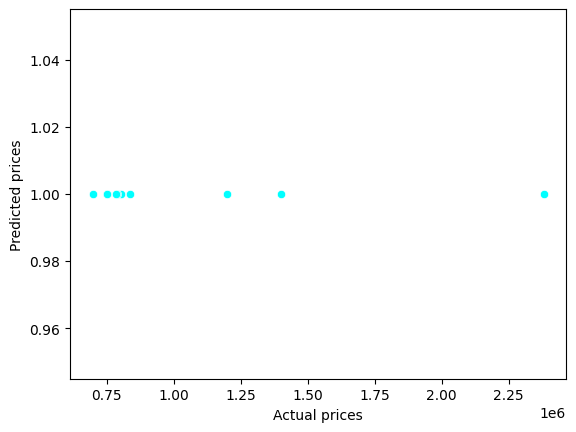

In [ ]:
sns.scatterplot(x=y[:10], y=predictions.flatten(),color='cyan')
plt.xlabel('Actual prices') 
plt.ylabel('Predicted prices') 
plt.show()